#                                  Bashar Nabil Al-Rihani
#                                        125689

## importing libraries

In [1]:
import pandas
import numpy
import matplotlib.pyplot
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn import datasets

# Open the CSV file

In [2]:
my_file = pandas.read_csv("SVMdataset.csv")
print(my_file.head())

         x1        x2  y
0  0.107143  0.603070  1
1  0.093318  0.649854  1
2  0.097926  0.705409  1
3  0.155530  0.784357  1
4  0.210829  0.866228  1


# seplit into Xs and Y

In [3]:
X = my_file.iloc[range(len(my_file)),[0,1]]
Y = my_file.iloc[range(len(my_file)),2]

# split data into train, CV and test 

In [4]:
x_train, x_others, y_train, y_others = train_test_split(X , Y, test_size=0.4, random_state=25)
x_CV, x_test, y_CV, y_test = train_test_split(x_others , y_others, test_size=0.5, random_state=25)

# plot training set

In [5]:
si = len(x_train)
print(si)
x1 = x_train.iloc[range(si),0]
#print(x1)
x2 = x_train.iloc[range(si),1]
#print(x2)

517


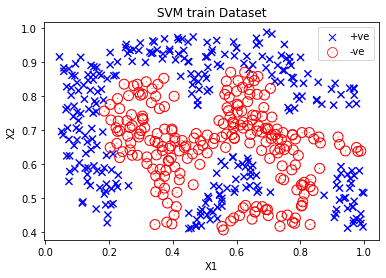

In [6]:
pos = matplotlib.pyplot.scatter(x1,x2,y_train==1,marker = "x",label = '+ve',color = "b",linewidth = 10)
neg = matplotlib.pyplot.scatter(x1,x2,y_train==0,marker = "o",label = '-ve',color = "r",linewidth = 10)
matplotlib.pyplot.legend(handles=[pos,neg])
matplotlib.pyplot.title("SVM train Dataset")
matplotlib.pyplot.ylabel("X2")
matplotlib.pyplot.xlabel("X1")
matplotlib.pyplot.show()

# plot CV set

In [7]:
si = len(x_CV)
print(si)
x1 = x_CV.iloc[range(si),0]
#print(x1)
x2 = x_CV.iloc[range(si),1]
#print(x2)

173


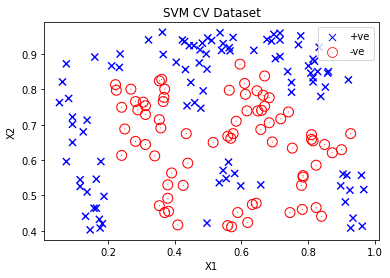

In [8]:
pos = matplotlib.pyplot.scatter(x1,x2,y_CV==1,marker = "x",label = '+ve',color = "b",linewidth = 10)
neg = matplotlib.pyplot.scatter(x1,x2,y_CV==0,marker = "o",label = '-ve',color = "r",linewidth = 10)
matplotlib.pyplot.legend(handles=[pos,neg])
matplotlib.pyplot.title("SVM CV Dataset")
matplotlib.pyplot.ylabel("X2")
matplotlib.pyplot.xlabel("X1")
matplotlib.pyplot.show()

# plot test set

In [9]:
si = len(x_test)
print(si)
x1 = x_test.iloc[range(si),0]
#print(x1)
x2 = x_test.iloc[range(si),1]
#print(x2)

173


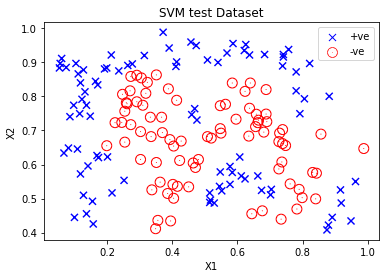

In [10]:
pos = matplotlib.pyplot.scatter(x1,x2,y_test==1,marker = "x",label = '+ve',color = "b",linewidth = 10)
neg = matplotlib.pyplot.scatter(x1,x2,y_test==0,marker = "o",label = '-ve',color = "r",linewidth = 10)
matplotlib.pyplot.legend(handles=[pos,neg])
matplotlib.pyplot.title("SVM test Dataset")
matplotlib.pyplot.ylabel("X2")
matplotlib.pyplot.xlabel("X1")
matplotlib.pyplot.show()

# train with linear kernel

In [11]:
bestF1 = 0
bestC = 0
best_linear_classfier = 0
for i1 in range(1,50):
        classifier1 = svm.SVC(kernel="linear", C= i1)
        classifier1fited = classifier1.fit(x_train,y_train)
        y_predict = classifier1.predict(x_CV)
        if metrics.f1_score(y_CV,y_predict) > bestF1: 
            bestF1 = metrics.f1_score(y_CV,y_predict)
            bestC = i1
            best_linear_classfier = classifier1fited

print("Best F1 value is : ",bestF1)
print("when C = ",bestC)
        #print("Accuracy:",metrics.accuracy_score(y_test,y_predict))
        #print("precision:",metrics.precision_score(y_test,y_predict))
        #print("recall:",metrics.recall_score(y_test,y_predict))
        #print("F1 score:",metrics.f1_score(y_test,y_predict))

Best F1 value is :  0.7232472324723248
when C =  1


# train with gaussian kernel

In [12]:
bestF1 = 0
bestC = 0
best_gamma = 0
best_gaussian_classfier = 0
for i1 in range(1,100):
    for i2 in ['auto','scale']:
        classifier2 = svm.SVC(kernel="rbf",C = i1, gamma = i2)
        classifier2fited = classifier2.fit(x_train,y_train)
        y_predict = classifier2.predict(x_CV)
        if metrics.f1_score(y_CV,y_predict) > bestF1:
            bestF1 = metrics.f1_score(y_CV,y_predict)
            bestC = i1
            best_gamma = i2
            best_gaussian_classfier = classifier2fited
print("Best F1 value is : ",bestF1)
print("when C = ",bestC,"   and gamma = ",best_gamma)

Best F1 value is :  0.9637305699481866
when C =  70    and gamma =  scale


# confusion matrices for gaussian kernel
# for training, CV and testing

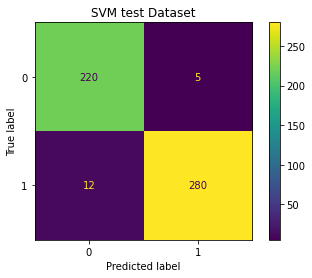

In [28]:
plot_confusion_matrix(best_gaussian_classfier, x_train, y_train)
matplotlib.pyplot.title("gaussian kernel train")
matplotlib.pyplot.show() 

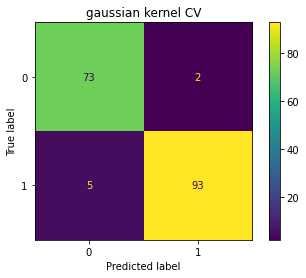

In [29]:
plot_confusion_matrix(best_gaussian_classfier, x_CV, y_CV)
matplotlib.pyplot.title("gaussian kernel CV")
matplotlib.pyplot.show() 

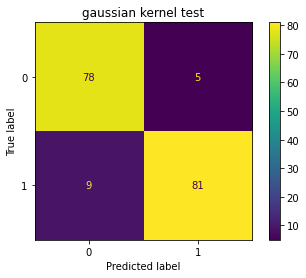

In [30]:
plot_confusion_matrix(best_gaussian_classfier, x_test, y_test)
matplotlib.pyplot.title("gaussian kernel test")
matplotlib.pyplot.show() 

# confusion matrices for linear kernel
# for training, CV and testing

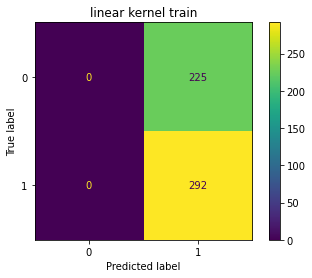

In [31]:
plot_confusion_matrix(best_linear_classfier, x_train, y_train)
matplotlib.pyplot.title("linear kernel train")
matplotlib.pyplot.show() 

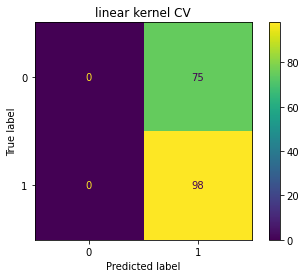

In [32]:
plot_confusion_matrix(best_linear_classfier, x_CV, y_CV)
matplotlib.pyplot.title("linear kernel CV")
matplotlib.pyplot.show() 

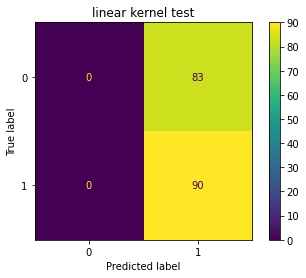

In [33]:
plot_confusion_matrix(best_linear_classfier, x_test, y_test)
matplotlib.pyplot.title("linear kernel test")
matplotlib.pyplot.show() 

In [19]:
x_newtest = x_test.to_numpy()

# Three plots showing the decision boundary for the two models

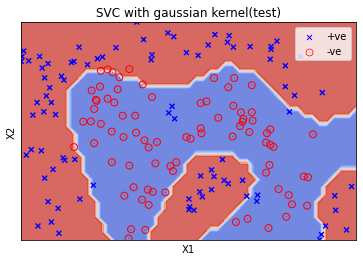

In [20]:
iris = datasets.load_iris()
X =x_newtest   # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = y_test

h = .02  # step size in the mesh


# create a mesh to plot in
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, h),
                     numpy.arange(y_min, y_max, h))

Z = best_gaussian_classfier.predict(numpy.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
matplotlib.pyplot.contourf(xx, yy, Z, cmap=matplotlib.pyplot.cm.coolwarm, alpha=0.8)

# Plot also the training points
matplotlib.pyplot.scatter(X[:, 0], X[:, 1],y==1, c='b',marker ="x",linewidth = 7,label = '+ve', )
matplotlib.pyplot.scatter(X[:, 0], X[:, 1],y==0, c='r',marker ="o",linewidth = 7,label = '-ve', )
matplotlib.pyplot.xlabel('X1')
matplotlib.pyplot.ylabel('X2')
matplotlib.pyplot.xlim(xx.min(), xx.max())
matplotlib.pyplot.ylim(yy.min(), yy.max())
matplotlib.pyplot.xticks(())
matplotlib.pyplot.yticks(())
matplotlib.pyplot.legend()
matplotlib.pyplot.title("SVC with gaussian kernel(test)")

matplotlib.pyplot.show()


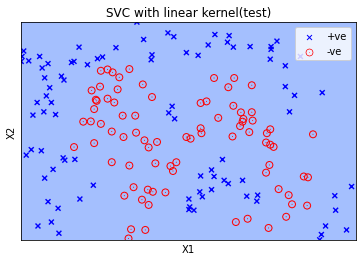

In [21]:
iris = datasets.load_iris()
X =x_newtest   # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = y_test

h = .02  # step size in the mesh


# create a mesh to plot in
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, h),
                     numpy.arange(y_min, y_max, h))

# create a mesh to plot in
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, h),
                     numpy.arange(y_min, y_max, h))

Z = best_linear_classfier.predict(numpy.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
matplotlib.pyplot.contourf(xx, yy, Z, cmap=matplotlib.pyplot.cm.coolwarm, alpha=0.8)

# Plot also the training points
matplotlib.pyplot.scatter(X[:, 0], X[:, 1],y==1, c='b',marker ="x",linewidth = 7,label = '+ve', )
matplotlib.pyplot.scatter(X[:, 0], X[:, 1],y==0, c='r',marker ="o",linewidth = 7,label = '-ve', )
matplotlib.pyplot.xlabel('X1')
matplotlib.pyplot.ylabel('X2')
matplotlib.pyplot.xlim(xx.min(), xx.max())
matplotlib.pyplot.ylim(yy.min(), yy.max())
matplotlib.pyplot.xticks(())
matplotlib.pyplot.yticks(())
matplotlib.pyplot.legend()
matplotlib.pyplot.title("SVC with linear kernel(test)")

matplotlib.pyplot.show()


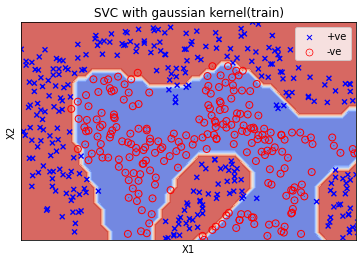

In [22]:
x_newtrain = x_train.to_numpy()
iris = datasets.load_iris()
X =x_newtrain   # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = y_train

h = .02  # step size in the mesh


# create a mesh to plot in
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, h),
                     numpy.arange(y_min, y_max, h))

# create a mesh to plot in
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, h),
                     numpy.arange(y_min, y_max, h))

Z = best_gaussian_classfier.predict(numpy.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
matplotlib.pyplot.contourf(xx, yy, Z, cmap=matplotlib.pyplot.cm.coolwarm, alpha=0.8)

# Plot also the training points
matplotlib.pyplot.scatter(X[:, 0], X[:, 1],y==1, c='b',marker ="x",linewidth = 7,label = '+ve', )
matplotlib.pyplot.scatter(X[:, 0], X[:, 1],y==0, c='r',marker ="o",linewidth = 7,label = '-ve', )
matplotlib.pyplot.xlabel('X1')
matplotlib.pyplot.ylabel('X2')
matplotlib.pyplot.xlim(xx.min(), xx.max())
matplotlib.pyplot.ylim(yy.min(), yy.max())
matplotlib.pyplot.xticks(())
matplotlib.pyplot.yticks(())
matplotlib.pyplot.legend()
matplotlib.pyplot.title("SVC with gaussian kernel(train)")

matplotlib.pyplot.show()


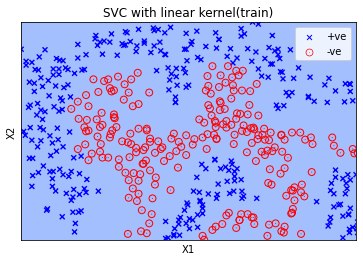

In [23]:
x_newtrain = x_train.to_numpy()
iris = datasets.load_iris()
X =x_newtrain   # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = y_train

h = .02  # step size in the mesh


# create a mesh to plot in
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, h),
                     numpy.arange(y_min, y_max, h))

# create a mesh to plot in
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, h),
                     numpy.arange(y_min, y_max, h))

Z = best_linear_classfier.predict(numpy.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
matplotlib.pyplot.contourf(xx, yy, Z, cmap=matplotlib.pyplot.cm.coolwarm, alpha=0.8)

# Plot also the training points
matplotlib.pyplot.scatter(X[:, 0], X[:, 1],y==1, c='b',marker ="x",linewidth = 7,label = '+ve', )
matplotlib.pyplot.scatter(X[:, 0], X[:, 1],y==0, c='r',marker ="o",linewidth = 7,label = '-ve', )
matplotlib.pyplot.xlabel('X1')
matplotlib.pyplot.ylabel('X2')
matplotlib.pyplot.xlim(xx.min(), xx.max())
matplotlib.pyplot.ylim(yy.min(), yy.max())
matplotlib.pyplot.xticks(())
matplotlib.pyplot.yticks(())
matplotlib.pyplot.legend()
matplotlib.pyplot.title("SVC with linear kernel(train)")

matplotlib.pyplot.show()


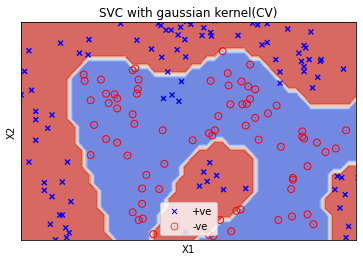

In [24]:
x_newCV = x_CV.to_numpy()
iris = datasets.load_iris()
X =x_newCV   # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = y_CV

h = .02  # step size in the mesh


# create a mesh to plot in
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, h),
                     numpy.arange(y_min, y_max, h))

# create a mesh to plot in
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, h),
                     numpy.arange(y_min, y_max, h))

Z = best_gaussian_classfier.predict(numpy.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
matplotlib.pyplot.contourf(xx, yy, Z, cmap=matplotlib.pyplot.cm.coolwarm, alpha=0.8)

# Plot also the training points
matplotlib.pyplot.scatter(X[:, 0], X[:, 1],y==1, c='b',marker ="x",linewidth = 7,label = '+ve', )
matplotlib.pyplot.scatter(X[:, 0], X[:, 1],y==0, c='r',marker ="o",linewidth = 7,label = '-ve', )
matplotlib.pyplot.xlabel('X1')
matplotlib.pyplot.ylabel('X2')
matplotlib.pyplot.xlim(xx.min(), xx.max())
matplotlib.pyplot.ylim(yy.min(), yy.max())
matplotlib.pyplot.xticks(())
matplotlib.pyplot.yticks(())
matplotlib.pyplot.legend()
matplotlib.pyplot.title("SVC with gaussian kernel(CV)")

matplotlib.pyplot.show()


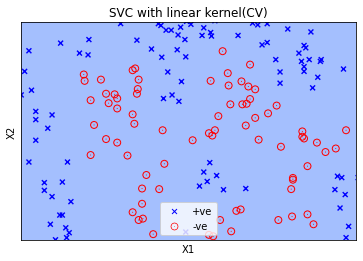

In [25]:
x_newCV = x_CV.to_numpy()
iris = datasets.load_iris()
X =x_newCV   # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = y_CV

h = .02  # step size in the mesh


# create a mesh to plot in
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, h),
                     numpy.arange(y_min, y_max, h))

# create a mesh to plot in
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, h),
                     numpy.arange(y_min, y_max, h))

Z = best_linear_classfier.predict(numpy.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
matplotlib.pyplot.contourf(xx, yy, Z, cmap=matplotlib.pyplot.cm.coolwarm, alpha=0.8)

# Plot also the training points
matplotlib.pyplot.scatter(X[:, 0], X[:, 1],y==1, c='b',marker ="x",linewidth = 7,label = '+ve', )
matplotlib.pyplot.scatter(X[:, 0], X[:, 1],y==0, c='r',marker ="o",linewidth = 7,label = '-ve', )
matplotlib.pyplot.xlabel('X1')
matplotlib.pyplot.ylabel('X2')
matplotlib.pyplot.xlim(xx.min(), xx.max())
matplotlib.pyplot.ylim(yy.min(), yy.max())
matplotlib.pyplot.xticks(())
matplotlib.pyplot.yticks(())
matplotlib.pyplot.legend()
matplotlib.pyplot.title("SVC with linear kernel(CV)")

matplotlib.pyplot.show()


# metrics

In [26]:
print("metrics for linear kernel SVM")
print("train :")
y_predict = best_linear_classfier.predict(x_train)
print("Accuracy:",metrics.accuracy_score(y_train,y_predict))
print("precision:",metrics.precision_score(y_train,y_predict))
print("recall:",metrics.recall_score(y_train,y_predict))
print("F1 score:",metrics.f1_score(y_train,y_predict))
print("CV :")
y_predict = best_linear_classfier.predict(x_CV)
print("Accuracy:",metrics.accuracy_score(y_CV,y_predict))
print("precision:",metrics.precision_score(y_CV,y_predict))
print("recall:",metrics.recall_score(y_CV,y_predict))
print("F1 score:",metrics.f1_score(y_CV,y_predict))
print("test :")
y_predict = best_linear_classfier.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_predict))
print("precision:",metrics.precision_score(y_test,y_predict))
print("recall:",metrics.recall_score(y_test,y_predict))
print("F1 score:",metrics.f1_score(y_test,y_predict))

metrics for linear kernel SVM
train :
Accuracy: 0.5647969052224371
precision: 0.5647969052224371
recall: 1.0
F1 score: 0.7218788627935723
CV :
Accuracy: 0.5664739884393064
precision: 0.5664739884393064
recall: 1.0
F1 score: 0.7232472324723248
test :
Accuracy: 0.5202312138728323
precision: 0.5202312138728323
recall: 1.0
F1 score: 0.6844106463878327


In [27]:
print("metrics for gaussian kernel SVM")
print("train :")
y_predict = best_gaussian_classfier.predict(x_train)
print("Accuracy:",metrics.accuracy_score(y_train,y_predict))
print("precision:",metrics.precision_score(y_train,y_predict))
print("recall:",metrics.recall_score(y_train,y_predict))
print("F1 score:",metrics.f1_score(y_train,y_predict))
print("CV :")
y_predict = best_gaussian_classfier.predict(x_CV)
print("Accuracy:",metrics.accuracy_score(y_CV,y_predict))
print("precision:",metrics.precision_score(y_CV,y_predict))
print("recall:",metrics.recall_score(y_CV,y_predict))
print("F1 score:",metrics.f1_score(y_CV,y_predict))
print("test :")
y_predict = best_gaussian_classfier.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_predict))
print("precision:",metrics.precision_score(y_test,y_predict))
print("recall:",metrics.recall_score(y_test,y_predict))
print("F1 score:",metrics.f1_score(y_test,y_predict))

metrics for gaussian kernel SVM
train :
Accuracy: 0.9671179883945842
precision: 0.9824561403508771
recall: 0.958904109589041
F1 score: 0.9705372616984402
CV :
Accuracy: 0.9595375722543352
precision: 0.9789473684210527
recall: 0.9489795918367347
F1 score: 0.9637305699481866
test :
Accuracy: 0.9190751445086706
precision: 0.9418604651162791
recall: 0.9
F1 score: 0.9204545454545455
